# Introduction to Linear Regression

In this tutorial, we'll discuss one of the foundational algorithms in machine learning: Linear regression. We'll create a model that predicts crop yields for apples and oranges (target variables) by looking at the average temperature, rainfall, and humidity (input variables or features) in a region. Here's the training data:

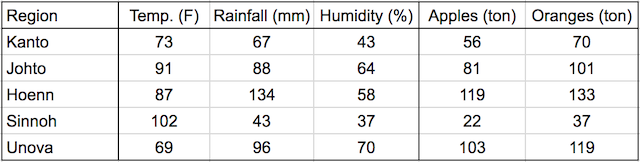


In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

    yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
    yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2


In [2]:
import numpy as np
import torch

In [3]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [4]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [5]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Linear Regression from scratch

In [7]:
# Define weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

print(w)
print(b)

tensor([[-1.4349, -0.9584, -1.2494],
        [-0.9137,  1.0134, -2.2651]], requires_grad=True)
tensor([0.5783, 0.1844], requires_grad=True)


In [9]:
# Define model
def model(x):
    return x @ w.t() + b

In [20]:
# Loss function
# We calculate MSE loss to get a single value for function, also accounting for negative values
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

## Train model using gradient descent

Our objective is to reduce the loss of the function. We reduce the loss and improve our model using the gradient descent optimization algorithm. Thus, we can train the model using the following steps:

 - Generate predictions
 - Calculate the loss
 - Compute gradients w.r.t the weights and biases
 - Adjust the weights by subtracting a small quantity proportional to the gradient
 - Reset the gradients to zero

In [22]:
num_epochs = 100
learning_rate = 1e-5

for i in range(num_epochs):
    # Generate predictions
    preds = model(inputs)

    # Calculate loss
    loss = mse(preds, targets)

    # Compute the gradient or derivative of the loss w.r.t. to the weights and biases because they have requires_grad set to True
    loss.backward()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()


In [23]:
# Verify that loss is less
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(374.6923, grad_fn=<DivBackward0>)


The loss is now much lower than its initial value. Let's look at the model's predictions and compare them with the targets.

In [24]:
print(preds)

tensor([[ 60.1695,  70.9738],
        [ 78.4067,  82.0092],
        [122.5078, 174.3314],
        [ 37.3761,  38.7615],
        [ 85.9180,  85.6938]], grad_fn=<AddBackward0>)


In [25]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Train model using PyTorch in-built functions

In [26]:
import torch.nn as nn

In [27]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

Create a `TensorDataset`, which allows access to rows from `inputs` and `targets` as tuples, and provides standard APIs for working with many different types of datasets in PyTorch. Also, create a `DataLoader`, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.


In [31]:
from torch.utils.data import TensorDataset, DataLoader

In [32]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [33]:
# Define dataloader
batch_size = 5

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [34]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 73.,  67.,  43.],
        [ 88., 134.,  59.],
        [ 91.,  88.,  64.],
        [ 68.,  96.,  71.],
        [ 74.,  66.,  43.]])
tensor([[ 56.,  70.],
        [118., 132.],
        [ 81., 101.],
        [104., 118.],
        [ 57.,  69.]])


In [35]:
# Define linear model class
model = nn.Linear(3, 2) # Input features = 3, Output features = 2 in our dataset

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4930,  0.5102,  0.2280],
        [-0.1357,  0.2681,  0.3971]], requires_grad=True)
Parameter containing:
tensor([-0.5309, -0.2864], requires_grad=True)


In [36]:
# Generate predictions
preds = model(inputs)
preds

tensor([[  7.4620,  24.8478],
        [ 14.0884,  36.3750],
        [ 38.1620,  46.8679],
        [-20.4489,  12.0961],
        [ 30.3848,  43.8874],
        [  6.4588,  24.4440],
        [ 13.8062,  36.5040],
        [ 37.8969,  47.1294],
        [-19.4456,  12.4999],
        [ 31.1058,  44.4201],
        [  7.1798,  24.9768],
        [ 13.0852,  35.9713],
        [ 38.4443,  46.7389],
        [-21.1699,  11.5633],
        [ 31.3881,  44.2911]], grad_fn=<AddmmBackward0>)

In [37]:
import torch.nn.functional as F

# Define loss function
loss_fn = F.mse_loss

# Compute loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(4016.9070, grad_fn=<MseLossBackward0>)


Instead of manually manipulating the model's weights & biases using gradients, we can use the optimizer optim.SGD. SGD is short for "stochastic gradient descent". The term stochastic indicates that samples are selected in random batches instead of as a single group.

In [40]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [41]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [43]:
# Train model for 100 epochs
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 6.2952
Epoch [20/100], Loss: 8.0246
Epoch [30/100], Loss: 6.8151
Epoch [40/100], Loss: 5.4368
Epoch [50/100], Loss: 5.3365
Epoch [60/100], Loss: 2.8941
Epoch [70/100], Loss: 4.1313
Epoch [80/100], Loss: 4.5915
Epoch [90/100], Loss: 3.8266
Epoch [100/100], Loss: 2.2380


In [44]:
# Generate predictions with new set of weights and biases after training
preds = model(inputs)
preds

tensor([[ 57.0739,  70.5985],
        [ 81.0900,  99.5981],
        [120.5011, 134.9122],
        [ 21.6549,  38.8623],
        [ 99.6020, 116.1399],
        [ 55.8130,  69.5128],
        [ 80.7491,  99.4989],
        [120.6951, 135.4148],
        [ 22.9158,  39.9481],
        [100.5220, 117.1265],
        [ 56.7331,  70.4994],
        [ 79.8290,  98.5123],
        [120.8420, 135.0114],
        [ 20.7349,  37.8757],
        [100.8629, 117.2257]], grad_fn=<AddmmBackward0>)

In [45]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

We can use it to make predictions of crop yields for new regions by passing a batch containing a single row of input (unseen data).

In [46]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[53.3134, 67.4840]], grad_fn=<AddmmBackward0>)

The predicted yield of apples is 53.3 tons per hectare, and that of oranges is 67.4 tons per hectare.